 <div class="alert alert-block alert-info" style="margin-top: 20px">
    <a>
         <img src="Fraud.png" width="350" align="center">
    </a>
    
<h1 align=center><font size = 5>Customer Fraud Analysis</font></h1>
<h4 align=center>Author: Himanshi Bairagi</h1>
</div>

Feature Explanation:

<li>distance_from_home - The distance from home where the transaction happened.
<li>distance_from_last_transaction - The distance from last transaction happened.
<li>ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.
<li>repeat_retailer - Is the transaction happened from same retailer.
<li>used_chip - Is the transaction through chip (credit card).
<li>used_pin_number - Is the transaction happened by using PIN number.
<li>online_order - Is the transaction an online order.
<li>fraud - Is the transaction fraudulent.

## Part 1: Exploratory Data Analysis

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cust_df = pd.read_csv('archive\card_transdata.csv')

cust_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [4]:
cust_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# identify if the data has any null values
print(cust_df.isnull().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


### Number of fraudulant and non-fraudulant transactions.

Shape of Fraudulant transactions: (87403, 8)
Shape of Non-Fraudulant transactions: (912597, 8)


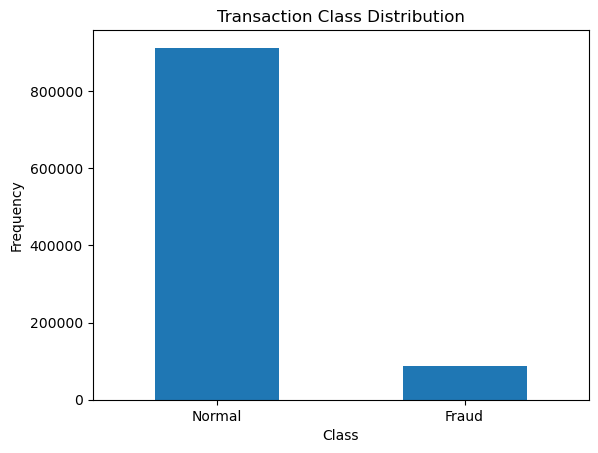

In [6]:
fraud = cust_df[cust_df['fraud']==1]
normal = cust_df[cust_df['fraud']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

LABELS = ["Normal", "Fraud"]

# plot counts of fraudulant and non-fraudulant transactions
count_classes = pd.value_counts(cust_df['fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

### How different is the ratio to median purchase price in different transaction classes?

In [7]:
pd.concat([fraud.ratio_to_median_purchase_price.describe(), normal.ratio_to_median_purchase_price.describe()], axis=1)

,ratio_to_median_purchase_price,ratio_to_median_purchase_price
count,87403.000000,912597.000000
mean,6.006323,1.423642
std,5.564320,1.946152
min,0.011966,0.004399
25%,3.500270,0.449768
50%,5.071294,0.913950
75%,7.331222,1.788918
max,266.689692,267.802942


### Do fraudulant transactions occur futher away from the home of the customer?

In [8]:
pd.concat([fraud.distance_from_home.describe(), normal.distance_from_home.describe()], axis=1)

,distance_from_home,distance_from_home
count,87403.000000,912597.000000
mean,66.261876,22.832976
std,134.391608,52.828655
min,0.025847,0.004874
25%,4.585729,3.828942
50%,15.454219,9.673847
75%,101.110104,24.158057
max,10632.723672,8777.136420


### Is there a significant difference in the distance from the place of last trasaction for fraudulant transactions?

In [9]:
pd.concat([fraud.distance_from_last_transaction.describe(), normal.distance_from_last_transaction.describe()], axis=1)

,distance_from_last_transaction,distance_from_last_transaction
count,87403.000000,912597.000000
mean,12.712185,4.301391
std,47.997697,22.472359
min,0.000407,0.000118
25%,0.328199,0.293859
50%,1.157631,0.985074
75%,4.598504,3.268578
max,2160.499922,11851.104565


### Do fraudulant transactions happen at more distinct locations?

In [10]:
pd.concat([fraud.repeat_retailer.describe(), normal.repeat_retailer.describe()], axis=1)

,repeat_retailer,repeat_retailer
count,87403.000000,912597.000000
mean,0.880119,0.881672
std,0.324825,0.322997
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


### Is there a difference in the authentication method across transaction classes?

In [11]:
pd.concat([fraud.used_chip.describe(), normal.used_chip.describe()], axis=1)

,used_chip,used_chip
count,87403.000000,912597.000000
mean,0.256399,0.359402
std,0.436647,0.479825
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [12]:
pd.concat([fraud.used_pin_number.describe(), normal.used_pin_number.describe()], axis=1)

,used_pin_number,used_pin_number
count,87403.000000,912597.000000
mean,0.003123,0.109944
std,0.055801,0.312821
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


### Are online transactions more prone to frauds?

In [13]:
pd.concat([fraud.online_order.describe(), normal.online_order.describe()], axis=1)

,online_order,online_order
count,87403.000000,912597.000000
mean,0.946318,0.622225
std,0.225391,0.484831
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


## Part 2: Data Analysis

In [46]:
np.random.seed(123)

fraud_samp = fraud.sample(50000)
normal_samp = normal.sample(50000)

fraud_samp['fraud'] = 1
normal_samp['fraud'] = 0

data_samp = pd.concat([fraud_samp, normal_samp], ignore_index=True)

data_samp.shape

(100000, 8)

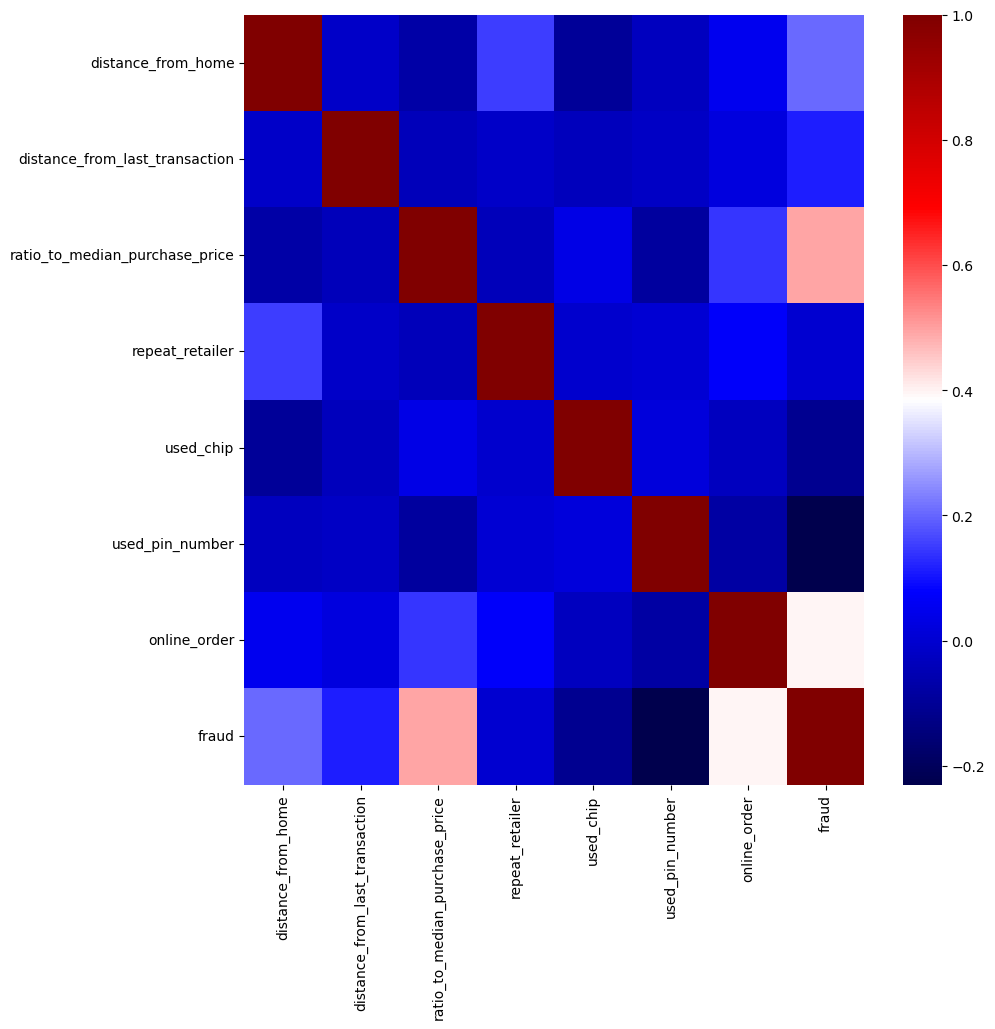

In [47]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data_samp.corr(), cmap="seismic")
plt.show();

In [48]:
data_samp.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.015464,-0.074788,0.150365,-0.098006,-0.032278,0.052618,0.203783
distance_from_last_transaction,-0.015464,1.000000,-0.037834,-0.014546,-0.034420,-0.019685,0.021938,0.114463
ratio_to_median_purchase_price,-0.074788,-0.037834,1.000000,-0.038353,0.035743,-0.089682,0.141989,0.491981
repeat_retailer,0.150365,-0.014546,-0.038353,1.000000,-0.007775,0.001360,0.070107,-0.001172
used_chip,-0.098006,-0.034420,0.035743,-0.007775,1.000000,0.018976,-0.028834,-0.113728
used_pin_number,-0.032278,-0.019685,-0.089682,0.001360,0.018976,1.000000,-0.078082,-0.229947
online_order,0.052618,0.021938,0.141989,0.070107,-0.028834,-0.078082,1.000000,0.396553
fraud,0.203783,0.114463,0.491981,-0.001172,-0.113728,-0.229947,0.396553,1.000000


Highest Co-orelation of fradulant transaction is with: 
<li>ratio_to_median_purchase_price (0.49)
<li>online_order (0.40)
<br><br>
This indicates transactions significantly higher than median purchase price and online transactions are more susceptible to fradulant activities. 

In [49]:
data_samp.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,3.552233,0.437685,33.188656,1.0,1.0,0.0,1.0,1
1,218.692265,0.133700,0.180273,1.0,0.0,0.0,1.0,1
2,1.838317,3.970778,7.382074,0.0,1.0,0.0,1.0,1
3,3.489291,0.854527,4.848553,1.0,1.0,0.0,1.0,1
4,7.009227,0.512246,5.509998,1.0,1.0,0.0,1.0,1


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = cust_df.drop('fraud', axis=1)
y = cust_df.fraud

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=10)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=10)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.08727321428571429
Non-Fraudulant transaction weight: 0.9127267857142857


In [55]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}\n")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}\n")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (560000, 7), y_train: (560000,)
_______________________________________________________

VALIDATION: X_validate: (140000, 7), y_validate: (140000,)
__________________________________________________

TESTING: X_test: (300000, 7), y_test: (300000,)


In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [ ]:
## Model Building

## Model Building

### 1. Artificial Neural Networks (ANNs)

In [57]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)
score = model.evaluate(X_test, y_test)
print(score)

Epoch 1/300
274/274 [==============================] - 13s 35ms/step - loss: 0.4613 - fn: 2007.0000 - fp: 82196.0000 - tn: 428931.0000 - tp: 46866.0000 - precision: 0.3631 - recall: 0.9589 - val_loss: 0.1374 - val_fn: 3382.0000 - val_fp: 258.0000 - val_tn: 127460.0000 - val_tp: 8900.0000 - val_precision: 0.9718 - val_recall: 0.7246
Epoch 2/300
274/274 [==============================] - 9s 33ms/step - loss: 0.1868 - fn: 2571.0000 - fp: 15191.0000 - tn: 495936.0000 - tp: 46302.0000 - precision: 0.7530 - recall: 0.9474 - val_loss: 0.0626 - val_fn: 1573.0000 - val_fp: 84.0000 - val_tn: 127634.0000 - val_tp: 10709.0000 - val_precision: 0.9922 - val_recall: 0.8719
Epoch 3/300
274/274 [==============================] - 11s 40ms/step - loss: 0.0951 - fn: 3434.0000 - fp: 6222.0000 - tn: 504905.0000 - tp: 45439.0000 - precision: 0.8796 - recall: 0.9297 - val_loss: 0.0452 - val_fn: 1511.0000 - val_fp: 18.0000 - val_tn: 127700.0000 - val_tp: 10771.0000 - val_precision: 0.9983 - val_recall: 0.8770


Epoch 26/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0138 - fn: 1709.0000 - fp: 1208.0000 - tn: 509919.0000 - tp: 47164.0000 - precision: 0.9750 - recall: 0.9650 - val_loss: 0.0075 - val_fn: 390.0000 - val_fp: 33.0000 - val_tn: 127685.0000 - val_tp: 11892.0000 - val_precision: 0.9972 - val_recall: 0.9682
Epoch 27/300
274/274 [==============================] - 9s 33ms/step - loss: 0.0133 - fn: 1715.0000 - fp: 1187.0000 - tn: 509940.0000 - tp: 47158.0000 - precision: 0.9754 - recall: 0.9649 - val_loss: 0.0065 - val_fn: 263.0000 - val_fp: 43.0000 - val_tn: 127675.0000 - val_tp: 12019.0000 - val_precision: 0.9964 - val_recall: 0.9786
Epoch 28/300
274/274 [==============================] - 9s 33ms/step - loss: 0.0131 - fn: 1621.0000 - fp: 1230.0000 - tn: 509897.0000 - tp: 47252.0000 - precision: 0.9746 - recall: 0.9668 - val_loss: 0.0073 - val_fn: 460.0000 - val_fp: 19.0000 - val_tn: 127699.0000 - val_tp: 11822.0000 - val_precision: 0.9984 - val_recall: 0.9625
Epoc

Epoch 51/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0078 - fn: 975.0000 - fp: 775.0000 - tn: 510352.0000 - tp: 47898.0000 - precision: 0.9841 - recall: 0.9801 - val_loss: 0.0037 - val_fn: 110.0000 - val_fp: 53.0000 - val_tn: 127665.0000 - val_tp: 12172.0000 - val_precision: 0.9957 - val_recall: 0.9910
Epoch 52/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0075 - fn: 923.0000 - fp: 736.0000 - tn: 510391.0000 - tp: 47950.0000 - precision: 0.9849 - recall: 0.9811 - val_loss: 0.0038 - val_fn: 191.0000 - val_fp: 26.0000 - val_tn: 127692.0000 - val_tp: 12091.0000 - val_precision: 0.9979 - val_recall: 0.9844
Epoch 53/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0079 - fn: 979.0000 - fp: 758.0000 - tn: 510369.0000 - tp: 47894.0000 - precision: 0.9844 - recall: 0.9800 - val_loss: 0.0036 - val_fn: 131.0000 - val_fp: 55.0000 - val_tn: 127663.0000 - val_tp: 12151.0000 - val_precision: 0.9955 - val_recall: 0.9893
Epoch 54/3

Epoch 76/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0053 - fn: 648.0000 - fp: 558.0000 - tn: 510569.0000 - tp: 48225.0000 - precision: 0.9886 - recall: 0.9867 - val_loss: 0.0025 - val_fn: 76.0000 - val_fp: 53.0000 - val_tn: 127665.0000 - val_tp: 12206.0000 - val_precision: 0.9957 - val_recall: 0.9938
Epoch 77/300
274/274 [==============================] - 9s 33ms/step - loss: 0.0053 - fn: 667.0000 - fp: 505.0000 - tn: 510622.0000 - tp: 48206.0000 - precision: 0.9896 - recall: 0.9864 - val_loss: 0.0036 - val_fn: 23.0000 - val_fp: 186.0000 - val_tn: 127532.0000 - val_tp: 12259.0000 - val_precision: 0.9851 - val_recall: 0.9981
Epoch 78/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0052 - fn: 649.0000 - fp: 529.0000 - tn: 510598.0000 - tp: 48224.0000 - precision: 0.9891 - recall: 0.9867 - val_loss: 0.0025 - val_fn: 43.0000 - val_fp: 84.0000 - val_tn: 127634.0000 - val_tp: 12239.0000 - val_precision: 0.9932 - val_recall: 0.9965
Epoch 79/300

Epoch 101/300
274/274 [==============================] - 8s 31ms/step - loss: 0.0043 - fn: 498.0000 - fp: 421.0000 - tn: 510706.0000 - tp: 48375.0000 - precision: 0.9914 - recall: 0.9898 - val_loss: 0.0023 - val_fn: 36.0000 - val_fp: 114.0000 - val_tn: 127604.0000 - val_tp: 12246.0000 - val_precision: 0.9908 - val_recall: 0.9971
Epoch 102/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0040 - fn: 520.0000 - fp: 397.0000 - tn: 510730.0000 - tp: 48353.0000 - precision: 0.9919 - recall: 0.9894 - val_loss: 0.0025 - val_fn: 52.0000 - val_fp: 90.0000 - val_tn: 127628.0000 - val_tp: 12230.0000 - val_precision: 0.9927 - val_recall: 0.9958
Epoch 103/300
274/274 [==============================] - 8s 31ms/step - loss: 0.0040 - fn: 504.0000 - fp: 421.0000 - tn: 510706.0000 - tp: 48369.0000 - precision: 0.9914 - recall: 0.9897 - val_loss: 0.0023 - val_fn: 52.0000 - val_fp: 86.0000 - val_tn: 127632.0000 - val_tp: 12230.0000 - val_precision: 0.9930 - val_recall: 0.9958
Epoch 104

Epoch 126/300
274/274 [==============================] - 14s 51ms/step - loss: 0.0034 - fn: 435.0000 - fp: 349.0000 - tn: 510778.0000 - tp: 48438.0000 - precision: 0.9928 - recall: 0.9911 - val_loss: 0.0020 - val_fn: 19.0000 - val_fp: 108.0000 - val_tn: 127610.0000 - val_tp: 12263.0000 - val_precision: 0.9913 - val_recall: 0.9985
Epoch 127/300
274/274 [==============================] - 14s 51ms/step - loss: 0.0033 - fn: 404.0000 - fp: 335.0000 - tn: 510792.0000 - tp: 48469.0000 - precision: 0.9931 - recall: 0.9917 - val_loss: 0.0016 - val_fn: 17.0000 - val_fp: 84.0000 - val_tn: 127634.0000 - val_tp: 12265.0000 - val_precision: 0.9932 - val_recall: 0.9986
Epoch 128/300
274/274 [==============================] - 14s 52ms/step - loss: 0.0031 - fn: 374.0000 - fp: 301.0000 - tn: 510826.0000 - tp: 48499.0000 - precision: 0.9938 - recall: 0.9923 - val_loss: 0.0026 - val_fn: 28.0000 - val_fp: 135.0000 - val_tn: 127583.0000 - val_tp: 12254.0000 - val_precision: 0.9891 - val_recall: 0.9977
Epoch

Epoch 151/300
274/274 [==============================] - 14s 52ms/step - loss: 0.0031 - fn: 366.0000 - fp: 316.0000 - tn: 510811.0000 - tp: 48507.0000 - precision: 0.9935 - recall: 0.9925 - val_loss: 0.0014 - val_fn: 17.0000 - val_fp: 54.0000 - val_tn: 127664.0000 - val_tp: 12265.0000 - val_precision: 0.9956 - val_recall: 0.9986
Epoch 152/300
274/274 [==============================] - 13s 46ms/step - loss: 0.0028 - fn: 352.0000 - fp: 297.0000 - tn: 510830.0000 - tp: 48521.0000 - precision: 0.9939 - recall: 0.9928 - val_loss: 0.0023 - val_fn: 19.0000 - val_fp: 142.0000 - val_tn: 127576.0000 - val_tp: 12263.0000 - val_precision: 0.9886 - val_recall: 0.9985
Epoch 153/300
274/274 [==============================] - 11s 39ms/step - loss: 0.0029 - fn: 370.0000 - fp: 290.0000 - tn: 510837.0000 - tp: 48503.0000 - precision: 0.9941 - recall: 0.9924 - val_loss: 0.0033 - val_fn: 21.0000 - val_fp: 166.0000 - val_tn: 127552.0000 - val_tp: 12261.0000 - val_precision: 0.9866 - val_recall: 0.9983
Epoch

Epoch 176/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0026 - fn: 319.0000 - fp: 273.0000 - tn: 510854.0000 - tp: 48554.0000 - precision: 0.9944 - recall: 0.9935 - val_loss: 0.0022 - val_fn: 10.0000 - val_fp: 106.0000 - val_tn: 127612.0000 - val_tp: 12272.0000 - val_precision: 0.9914 - val_recall: 0.9992
Epoch 177/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0024 - fn: 305.0000 - fp: 239.0000 - tn: 510888.0000 - tp: 48568.0000 - precision: 0.9951 - recall: 0.9938 - val_loss: 0.0015 - val_fn: 11.0000 - val_fp: 80.0000 - val_tn: 127638.0000 - val_tp: 12271.0000 - val_precision: 0.9935 - val_recall: 0.9991
Epoch 178/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0025 - fn: 287.0000 - fp: 253.0000 - tn: 510874.0000 - tp: 48586.0000 - precision: 0.9948 - recall: 0.9941 - val_loss: 0.0015 - val_fn: 16.0000 - val_fp: 68.0000 - val_tn: 127650.0000 - val_tp: 12266.0000 - val_precision: 0.9945 - val_recall: 0.9987
Epoch 179

Epoch 201/300
274/274 [==============================] - 9s 33ms/step - loss: 0.0023 - fn: 271.0000 - fp: 243.0000 - tn: 510884.0000 - tp: 48602.0000 - precision: 0.9950 - recall: 0.9945 - val_loss: 0.0027 - val_fn: 4.0000 - val_fp: 145.0000 - val_tn: 127573.0000 - val_tp: 12278.0000 - val_precision: 0.9883 - val_recall: 0.9997
Epoch 202/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0022 - fn: 255.0000 - fp: 214.0000 - tn: 510913.0000 - tp: 48618.0000 - precision: 0.9956 - recall: 0.9948 - val_loss: 0.0016 - val_fn: 5.0000 - val_fp: 98.0000 - val_tn: 127620.0000 - val_tp: 12277.0000 - val_precision: 0.9921 - val_recall: 0.9996
Epoch 203/300
274/274 [==============================] - 9s 34ms/step - loss: 0.0024 - fn: 286.0000 - fp: 243.0000 - tn: 510884.0000 - tp: 48587.0000 - precision: 0.9950 - recall: 0.9941 - val_loss: 0.0019 - val_fn: 8.0000 - val_fp: 116.0000 - val_tn: 127602.0000 - val_tp: 12274.0000 - val_precision: 0.9906 - val_recall: 0.9993
Epoch 204/3

Epoch 226/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0020 - fn: 237.0000 - fp: 202.0000 - tn: 510925.0000 - tp: 48636.0000 - precision: 0.9959 - recall: 0.9952 - val_loss: 0.0028 - val_fn: 7.0000 - val_fp: 144.0000 - val_tn: 127574.0000 - val_tp: 12275.0000 - val_precision: 0.9884 - val_recall: 0.9994
Epoch 227/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0021 - fn: 249.0000 - fp: 199.0000 - tn: 510928.0000 - tp: 48624.0000 - precision: 0.9959 - recall: 0.9949 - val_loss: 0.0019 - val_fn: 7.0000 - val_fp: 111.0000 - val_tn: 127607.0000 - val_tp: 12275.0000 - val_precision: 0.9910 - val_recall: 0.9994
Epoch 228/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0021 - fn: 251.0000 - fp: 231.0000 - tn: 510896.0000 - tp: 48622.0000 - precision: 0.9953 - recall: 0.9949 - val_loss: 0.0013 - val_fn: 7.0000 - val_fp: 77.0000 - val_tn: 127641.0000 - val_tp: 12275.0000 - val_precision: 0.9938 - val_recall: 0.9994
Epoch 229/3

Epoch 251/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0019 - fn: 216.0000 - fp: 192.0000 - tn: 510935.0000 - tp: 48657.0000 - precision: 0.9961 - recall: 0.9956 - val_loss: 0.0016 - val_fn: 10.0000 - val_fp: 90.0000 - val_tn: 127628.0000 - val_tp: 12272.0000 - val_precision: 0.9927 - val_recall: 0.9992
Epoch 252/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0019 - fn: 241.0000 - fp: 189.0000 - tn: 510938.0000 - tp: 48632.0000 - precision: 0.9961 - recall: 0.9951 - val_loss: 0.0021 - val_fn: 4.0000 - val_fp: 111.0000 - val_tn: 127607.0000 - val_tp: 12278.0000 - val_precision: 0.9910 - val_recall: 0.9997
Epoch 253/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0021 - fn: 232.0000 - fp: 205.0000 - tn: 510922.0000 - tp: 48641.0000 - precision: 0.9958 - recall: 0.9953 - val_loss: 0.0019 - val_fn: 19.0000 - val_fp: 98.0000 - val_tn: 127620.0000 - val_tp: 12263.0000 - val_precision: 0.9921 - val_recall: 0.9985
Epoch 254/

Epoch 276/300
274/274 [==============================] - 9s 33ms/step - loss: 0.0018 - fn: 226.0000 - fp: 185.0000 - tn: 510942.0000 - tp: 48647.0000 - precision: 0.9962 - recall: 0.9954 - val_loss: 0.0016 - val_fn: 3.0000 - val_fp: 85.0000 - val_tn: 127633.0000 - val_tp: 12279.0000 - val_precision: 0.9931 - val_recall: 0.9998
Epoch 277/300
274/274 [==============================] - 9s 32ms/step - loss: 0.0018 - fn: 215.0000 - fp: 191.0000 - tn: 510936.0000 - tp: 48658.0000 - precision: 0.9961 - recall: 0.9956 - val_loss: 0.0021 - val_fn: 9.0000 - val_fp: 120.0000 - val_tn: 127598.0000 - val_tp: 12273.0000 - val_precision: 0.9903 - val_recall: 0.9993
Epoch 278/300
274/274 [==============================] - 9s 33ms/step - loss: 0.0019 - fn: 220.0000 - fp: 199.0000 - tn: 510928.0000 - tp: 48653.0000 - precision: 0.9959 - recall: 0.9955 - val_loss: 0.0018 - val_fn: 10.0000 - val_fp: 82.0000 - val_tn: 127636.0000 - val_tp: 12272.0000 - val_precision: 0.9934 - val_recall: 0.9992
Epoch 279/3

9375/9375 [==============================] - 9s 1ms/step - loss: 0.0022 - fn: 15.0000 - fp: 256.0000 - tn: 273496.0000 - tp: 26233.0000 - precision: 0.9903 - recall: 0.9994
[0.002169676823541522, 15.0, 256.0, 273496.0, 26233.0, 0.9903355836868286, 0.9994285106658936]


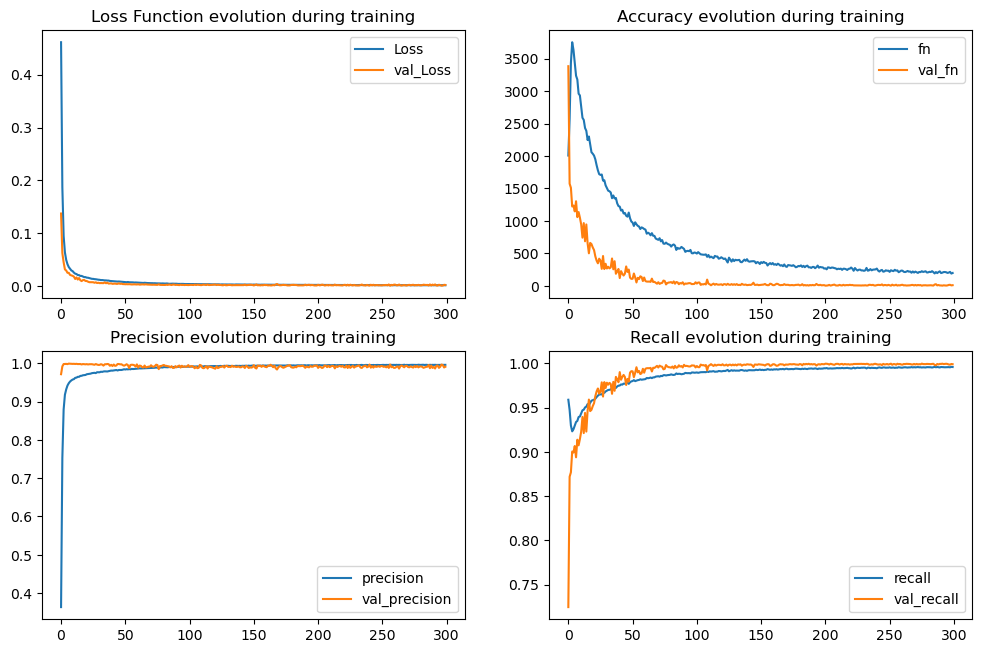

In [59]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [60]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

9375/9375 [==============================] - 14s 1ms/step
Train Result:
Accuracy Score: 99.91%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999961      0.990531   0.99913       0.995246       0.999138
recall          0.999086      0.999591   0.99913       0.999339       0.999130
f1-score        0.999523      0.995040   0.99913       0.997282       0.999132
support    511127.000000  48873.000000   0.99913  560000.000000  560000.000000
_______________________________________________
Confusion Matrix: 
 [[510660    467]
 [    20  48853]]

Test Result:
Accuracy Score: 99.91%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999945      0.990336  0.999097       0.995140       0.999104
recall          0.999065      0.999429  0.999097       0.999247       

### 2. XG Boost

In [72]:
pip install xgboost;

Note: you may need to restart the kernel to use updated packages.


In [68]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

C:\Users\Himanshu\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                0.0      1.0  accuracy  macro avg  weighted avg
precision       1.0      1.0       1.0        1.0           1.0
recall          1.0      1.0       1.0        1.0           1.0
f1-score        1.0      1.0       1.0        1.0           1.0
support    511127.0  48873.0       1.0   560000.0      560000.0
_______________________________________________
Confusion Matrix: 
 [[511127      0]
 [     0  48873]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999989      0.999962  0.999987       0.999975       0.999987
recall          0.999996      0.999886  0.999987       0.999941       0.999987
f1-score        0.999993      0.999924  0.999987       0.999958       0.999987
support    273752.000000  26248.000000  0.9

### 3. Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                0.0      1.0  accuracy  macro avg  weighted avg
precision       1.0      1.0       1.0        1.0           1.0
recall          1.0      1.0       1.0        1.0           1.0
f1-score        1.0      1.0       1.0        1.0           1.0
support    511127.0  48873.0       1.0   560000.0      560000.0
_______________________________________________
Confusion Matrix: 
 [[511127      0]
 [     0  48873]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999996      1.000000  0.999997       0.999998       0.999997
recall          1.000000      0.999962  0.999997       0.999981       0.999997
f1-score        0.999998      0.999981  0.999997       0.999990       0.999997
support    273752.000000  26248.000000  0.9

### 4. CatBoost

In [73]:
pip install catboost;


     ------------------------------------- 101.0/101.0 MB 19.3 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00


In [74]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Learning rate set to 0.153607
0:	learn: 0.2636510	total: 184ms	remaining: 3m 4s
1:	learn: 0.1327471	total: 228ms	remaining: 1m 53s
2:	learn: 0.0634735	total: 272ms	remaining: 1m 30s
3:	learn: 0.0286637	total: 314ms	remaining: 1m 18s
4:	learn: 0.0197339	total: 357ms	remaining: 1m 11s
5:	learn: 0.0139148	total: 399ms	remaining: 1m 6s
6:	learn: 0.0104190	total: 444ms	remaining: 1m 2s
7:	learn: 0.0090501	total: 488ms	remaining: 1m
8:	learn: 0.0065040	total: 530ms	remaining: 58.4s
9:	learn: 0.0058768	total: 573ms	remaining: 56.7s
10:	learn: 0.0050740	total: 618ms	remaining: 55.6s
11:	learn: 0.0047321	total: 666ms	remaining: 54.8s
12:	learn: 0.0042662	total: 715ms	remaining: 54.3s
13:	learn: 0.0040490	total: 763ms	remaining: 53.8s
14:	learn: 0.0038279	total: 808ms	remaining: 53.1s
15:	learn: 0.0036925	total: 857ms	remaining: 52.7s
16:	learn: 0.0036368	total: 908ms	remaining: 52.5s
17:	learn: 0.0036172	total: 960ms	remaining: 52.4s
18:	learn: 0.0034524	total: 1s	remaining: 51.8s
19:	learn: 0.

160:	learn: 0.0026316	total: 7.92s	remaining: 41.3s
161:	learn: 0.0026316	total: 7.96s	remaining: 41.2s
162:	learn: 0.0026316	total: 8.01s	remaining: 41.1s
163:	learn: 0.0026316	total: 8.06s	remaining: 41.1s
164:	learn: 0.0026316	total: 8.1s	remaining: 41s
165:	learn: 0.0026316	total: 8.14s	remaining: 40.9s
166:	learn: 0.0026316	total: 8.19s	remaining: 40.9s
167:	learn: 0.0026316	total: 8.23s	remaining: 40.8s
168:	learn: 0.0026316	total: 8.28s	remaining: 40.7s
169:	learn: 0.0026316	total: 8.32s	remaining: 40.6s
170:	learn: 0.0026316	total: 8.37s	remaining: 40.6s
171:	learn: 0.0026316	total: 8.41s	remaining: 40.5s
172:	learn: 0.0026316	total: 8.45s	remaining: 40.4s
173:	learn: 0.0026316	total: 8.49s	remaining: 40.3s
174:	learn: 0.0026316	total: 8.54s	remaining: 40.3s
175:	learn: 0.0026316	total: 8.58s	remaining: 40.2s
176:	learn: 0.0026316	total: 8.63s	remaining: 40.1s
177:	learn: 0.0026316	total: 8.67s	remaining: 40s
178:	learn: 0.0026316	total: 8.71s	remaining: 39.9s
179:	learn: 0.002

324:	learn: 0.0026316	total: 14.5s	remaining: 30.2s
325:	learn: 0.0026316	total: 14.6s	remaining: 30.1s
326:	learn: 0.0026316	total: 14.6s	remaining: 30.1s
327:	learn: 0.0026316	total: 14.6s	remaining: 30s
328:	learn: 0.0026316	total: 14.7s	remaining: 30s
329:	learn: 0.0026316	total: 14.7s	remaining: 29.9s
330:	learn: 0.0026316	total: 14.8s	remaining: 29.9s
331:	learn: 0.0026316	total: 14.8s	remaining: 29.8s
332:	learn: 0.0026316	total: 14.9s	remaining: 29.8s
333:	learn: 0.0026316	total: 14.9s	remaining: 29.7s
334:	learn: 0.0026316	total: 14.9s	remaining: 29.6s
335:	learn: 0.0026316	total: 15s	remaining: 29.6s
336:	learn: 0.0026316	total: 15s	remaining: 29.5s
337:	learn: 0.0026316	total: 15s	remaining: 29.5s
338:	learn: 0.0026316	total: 15.1s	remaining: 29.4s
339:	learn: 0.0026316	total: 15.1s	remaining: 29.4s
340:	learn: 0.0026316	total: 15.2s	remaining: 29.3s
341:	learn: 0.0026316	total: 15.2s	remaining: 29.2s
342:	learn: 0.0026316	total: 15.2s	remaining: 29.2s
343:	learn: 0.0026316	

485:	learn: 0.0026316	total: 21s	remaining: 22.2s
486:	learn: 0.0026316	total: 21.1s	remaining: 22.2s
487:	learn: 0.0026316	total: 21.1s	remaining: 22.1s
488:	learn: 0.0026316	total: 21.1s	remaining: 22.1s
489:	learn: 0.0026316	total: 21.2s	remaining: 22.1s
490:	learn: 0.0026316	total: 21.2s	remaining: 22s
491:	learn: 0.0026316	total: 21.3s	remaining: 22s
492:	learn: 0.0026316	total: 21.3s	remaining: 21.9s
493:	learn: 0.0026316	total: 21.4s	remaining: 21.9s
494:	learn: 0.0026316	total: 21.4s	remaining: 21.8s
495:	learn: 0.0026316	total: 21.4s	remaining: 21.8s
496:	learn: 0.0026316	total: 21.5s	remaining: 21.7s
497:	learn: 0.0026316	total: 21.5s	remaining: 21.7s
498:	learn: 0.0026316	total: 21.6s	remaining: 21.6s
499:	learn: 0.0026316	total: 21.6s	remaining: 21.6s
500:	learn: 0.0026316	total: 21.6s	remaining: 21.5s
501:	learn: 0.0026316	total: 21.7s	remaining: 21.5s
502:	learn: 0.0026316	total: 21.7s	remaining: 21.4s
503:	learn: 0.0026316	total: 21.8s	remaining: 21.4s
504:	learn: 0.0026

646:	learn: 0.0026316	total: 27.8s	remaining: 15.2s
647:	learn: 0.0026316	total: 27.8s	remaining: 15.1s
648:	learn: 0.0026316	total: 27.9s	remaining: 15.1s
649:	learn: 0.0026316	total: 27.9s	remaining: 15s
650:	learn: 0.0026316	total: 28s	remaining: 15s
651:	learn: 0.0026316	total: 28s	remaining: 14.9s
652:	learn: 0.0026316	total: 28s	remaining: 14.9s
653:	learn: 0.0026316	total: 28.1s	remaining: 14.9s
654:	learn: 0.0026316	total: 28.1s	remaining: 14.8s
655:	learn: 0.0026316	total: 28.2s	remaining: 14.8s
656:	learn: 0.0026316	total: 28.2s	remaining: 14.7s
657:	learn: 0.0026316	total: 28.2s	remaining: 14.7s
658:	learn: 0.0026316	total: 28.3s	remaining: 14.6s
659:	learn: 0.0026316	total: 28.3s	remaining: 14.6s
660:	learn: 0.0026316	total: 28.4s	remaining: 14.5s
661:	learn: 0.0026316	total: 28.4s	remaining: 14.5s
662:	learn: 0.0026316	total: 28.4s	remaining: 14.4s
663:	learn: 0.0026316	total: 28.5s	remaining: 14.4s
664:	learn: 0.0026316	total: 28.5s	remaining: 14.4s
665:	learn: 0.0026316	

807:	learn: 0.0026316	total: 34.2s	remaining: 8.12s
808:	learn: 0.0026316	total: 34.2s	remaining: 8.07s
809:	learn: 0.0026316	total: 34.2s	remaining: 8.03s
810:	learn: 0.0026316	total: 34.3s	remaining: 7.99s
811:	learn: 0.0026316	total: 34.3s	remaining: 7.95s
812:	learn: 0.0026316	total: 34.4s	remaining: 7.91s
813:	learn: 0.0026316	total: 34.4s	remaining: 7.86s
814:	learn: 0.0026316	total: 34.5s	remaining: 7.82s
815:	learn: 0.0026316	total: 34.5s	remaining: 7.78s
816:	learn: 0.0026316	total: 34.5s	remaining: 7.74s
817:	learn: 0.0026316	total: 34.6s	remaining: 7.69s
818:	learn: 0.0026316	total: 34.6s	remaining: 7.65s
819:	learn: 0.0026316	total: 34.7s	remaining: 7.61s
820:	learn: 0.0026316	total: 34.7s	remaining: 7.56s
821:	learn: 0.0026316	total: 34.7s	remaining: 7.52s
822:	learn: 0.0026316	total: 34.8s	remaining: 7.48s
823:	learn: 0.0026316	total: 34.8s	remaining: 7.43s
824:	learn: 0.0026316	total: 34.9s	remaining: 7.39s
825:	learn: 0.0026316	total: 34.9s	remaining: 7.35s
826:	learn: 

971:	learn: 0.0026316	total: 40.8s	remaining: 1.18s
972:	learn: 0.0026316	total: 40.9s	remaining: 1.13s
973:	learn: 0.0026316	total: 40.9s	remaining: 1.09s
974:	learn: 0.0026316	total: 41s	remaining: 1.05s
975:	learn: 0.0026316	total: 41s	remaining: 1.01s
976:	learn: 0.0026316	total: 41s	remaining: 966ms
977:	learn: 0.0026316	total: 41.1s	remaining: 924ms
978:	learn: 0.0026316	total: 41.1s	remaining: 882ms
979:	learn: 0.0026316	total: 41.1s	remaining: 840ms
980:	learn: 0.0026316	total: 41.2s	remaining: 798ms
981:	learn: 0.0026316	total: 41.2s	remaining: 756ms
982:	learn: 0.0026316	total: 41.3s	remaining: 714ms
983:	learn: 0.0026316	total: 41.3s	remaining: 672ms
984:	learn: 0.0026316	total: 41.3s	remaining: 630ms
985:	learn: 0.0026316	total: 41.4s	remaining: 588ms
986:	learn: 0.0026316	total: 41.4s	remaining: 546ms
987:	learn: 0.0026316	total: 41.5s	remaining: 504ms
988:	learn: 0.0026316	total: 41.5s	remaining: 462ms
989:	learn: 0.0026316	total: 41.5s	remaining: 420ms
990:	learn: 0.0026

### 5. LigthGBM

In [75]:
pip install lightgbm;

     ---------------------------------------- 1.0/1.0 MB 10.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [76]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.84%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999274      0.989857   0.99845       0.994565       0.998452
recall          0.999028      0.992409   0.99845       0.995718       0.998450
f1-score        0.999151      0.991131   0.99845       0.995141       0.998451
support    511127.000000  48873.000000   0.99845  560000.000000  560000.000000
_______________________________________________
Confusion Matrix: 
 [[510630    497]
 [   371  48502]]

Test Result:
Accuracy Score: 99.80%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999028      0.987083   0.99798       0.993056       0.997983
recall          0.998758      0.989866   0.99798       0.994312       0.997980
f1-score        0.998893      0.988473   0.99798 

### Model Comparison

<AxesSubplot:>

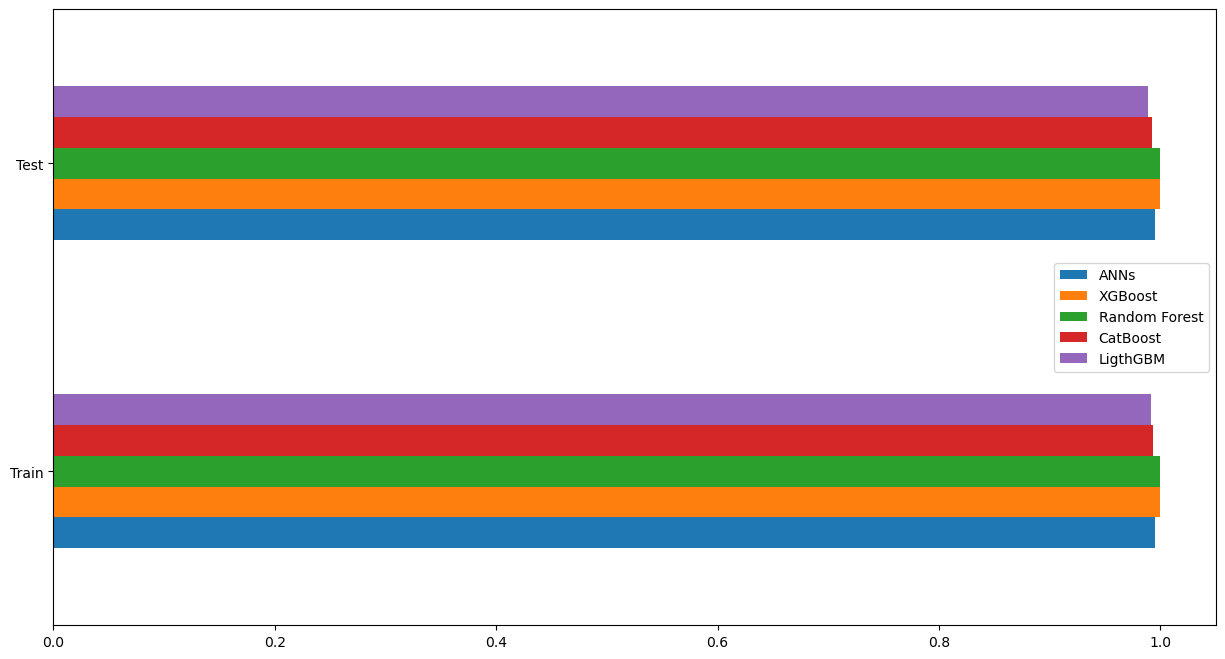

In [77]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))